### Imports

In [4]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import matplotlib.pyplot as plt

### Carregar base de dados

In [5]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv"
column_names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
data = pd.read_csv(url, header=None, names=column_names)

In [6]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


### Escolher variavel preditora

In [7]:
X = data[['CRIM']].values
y = data['MEDV'].values

### Dividir os dados em treinamento e teste

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Modelo de regressao linear

In [9]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

### Avaliar o modelo de regressao linear

In [21]:
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)
print("Regressão Linear:")
print(f"Mean Absolute Error: {mae_linear:.2f}")
print(f"Mean Squared Error: {mse_linear:.2f}")

Regressão Linear:
Mean Absolute Error: 5.63
Mean Squared Error: 61.69


### modelo de rede neural

In [11]:
nn_model = Sequential([
    Dense(10, activation='relu', input_shape=(1,)),
    Dense(1, activation='linear')
])
nn_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

/home/peter/Code/6per/Regressao-simples-e-logistica/.venv/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
W0000 00:00:1733341003.927422   19363 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


### Treinar o modelo de rede neural

In [12]:
nn_model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=1)

Epoch 1/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 579.7637 - mae: 22.0798
Epoch 2/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 546.1382 - mae: 21.0383
Epoch 3/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 571.5826 - mae: 21.3180
Epoch 4/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 556.2870 - mae: 21.3946
Epoch 5/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 571.7441 - mae: 21.4787
Epoch 6/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 580.9243 - mae: 21.5030
Epoch 7/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 579.0771 - mae: 21.5006
Epoch 8/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 536.0936 - mae: 20.6629
Epoch 9/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 518.5598 - mae: 20.1643
Epoch 10/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 533.3780 - mae: 20.6169
Epoch 11/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 558.0870 - mae: 21.0629
Epoch 12/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 514.2154 - mae: 20.3179
Epoch 13/50
4

In [19]:
y_pred_nn = nn_model.predict(X_test)
mae_nn = mean_absolute_error(y_test, y_pred_nn)
mse_nn = mean_squared_error(y_test, y_pred_nn)
print("Rede neural:")
print(f"Mean Absolute Error: {mae_nn:.2f}")
print(f"Mean Squared Error: {mse_nn:.2f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Rede neural:
Mean Absolute Error: 7.24
Mean Squared Error: 103.22


In [22]:
metrics = pd.DataFrame({
    "Modelo": ["Regressão Linear", "Rede Neural"],
    "MAE": [mae_linear, mae_nn],
    "MSE": [mse_linear, mse_nn]
})

print("\nMétricas Comparativas:")
print(metrics)


Métricas Comparativas:
             Modelo       MAE         MSE
0  Regressão Linear  5.631052   61.694137
1       Rede Neural  7.235850  103.215042


In [23]:
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

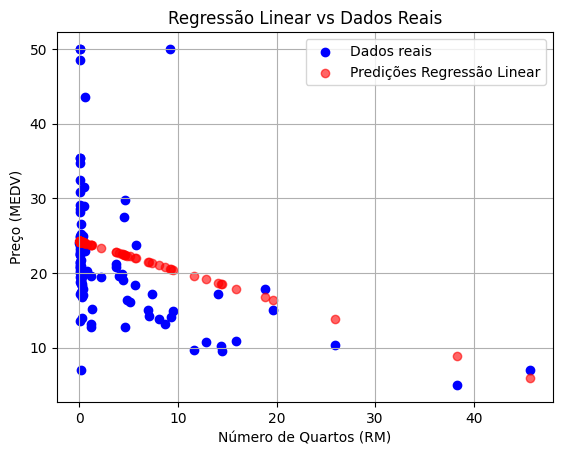

In [24]:
plt.scatter(X_test, y_test, color='blue', label='Dados reais')
plt.scatter(X_test, y_pred_linear, color='red', label='Predições Regressão Linear', alpha=0.6)
plt.title("Regressão Linear vs Dados Reais")
plt.xlabel("Número de Quartos (RM)")
plt.ylabel("Preço (MEDV)")
plt.legend()
plt.grid()
plt.show()

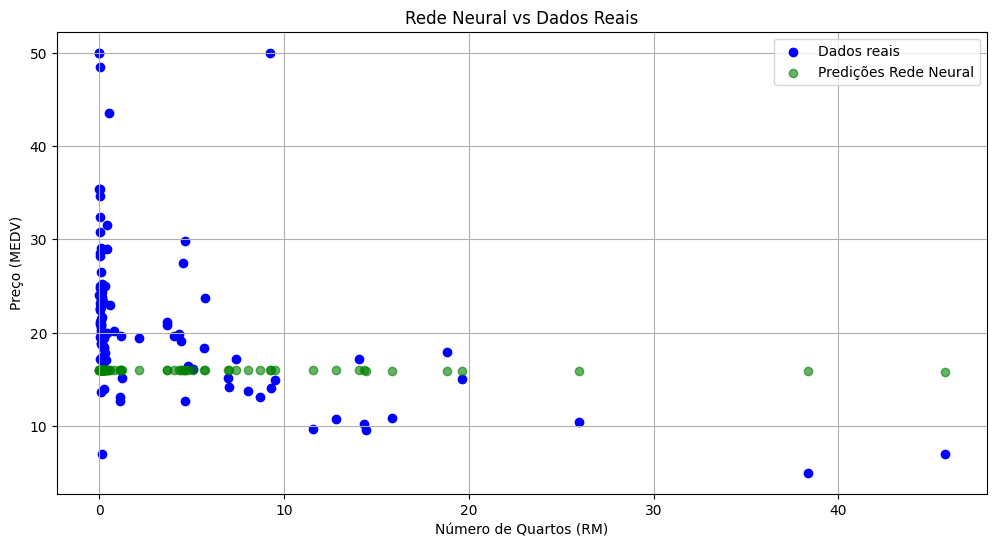

In [25]:
plt.figure(figsize=(12, 6))
plt.scatter(X_test, y_test, color='blue', label='Dados reais')
plt.scatter(X_test, y_pred_nn, color='green', label='Predições Rede Neural', alpha=0.6)
plt.title("Rede Neural vs Dados Reais")
plt.xlabel("Número de Quartos (RM)")
plt.ylabel("Preço (MEDV)")
plt.legend()
plt.grid()
plt.show()

<Figure size 1000x600 with 0 Axes>

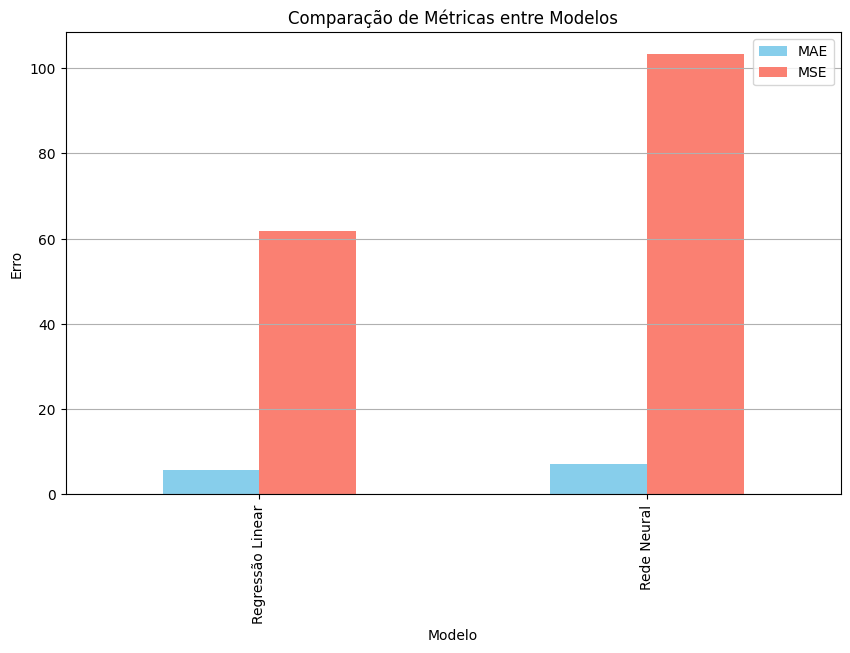

In [26]:
plt.figure(figsize=(10, 6))
metrics.set_index("Modelo")[["MAE", "MSE"]].plot(kind="bar", figsize=(10, 6), color=['skyblue', 'salmon'])
plt.title("Comparação de Métricas entre Modelos")
plt.ylabel("Erro")
plt.grid(axis='y')
plt.show()
